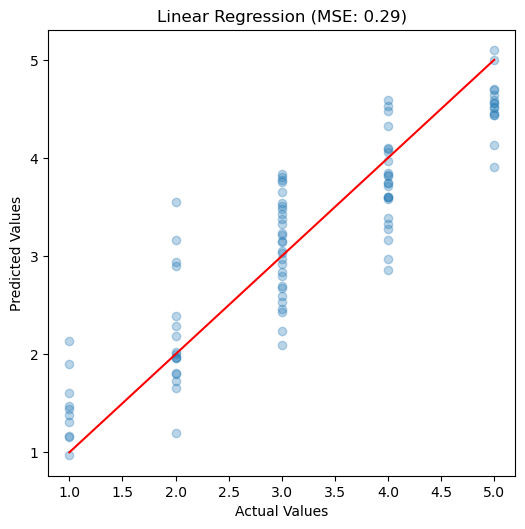

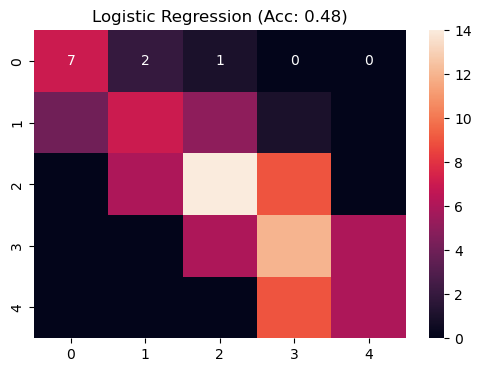

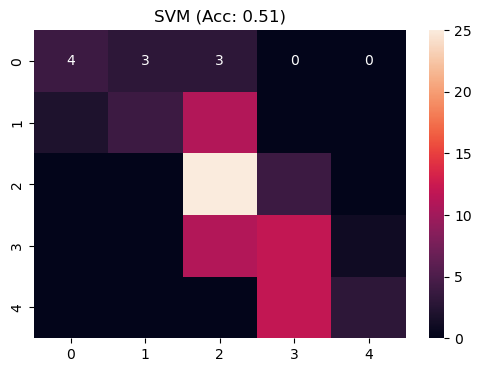

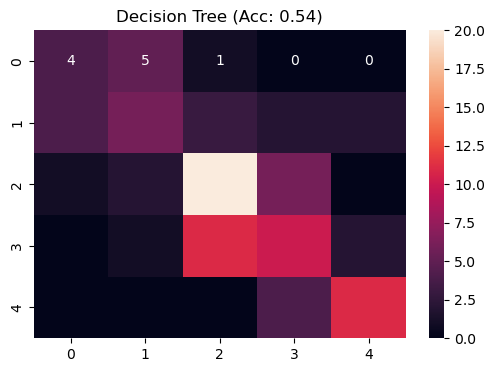

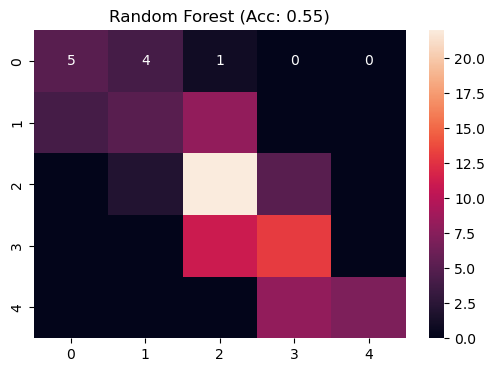

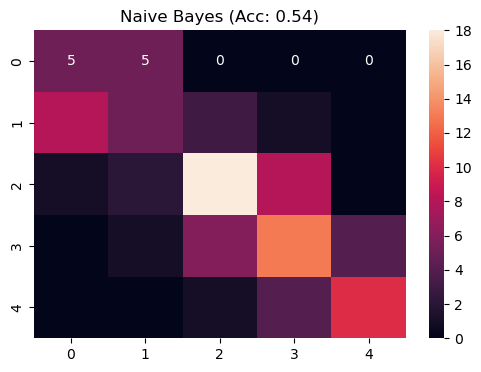

KNN Accuracy: 0.39
KNN Confusion Matrix:
[[ 4  3  3  0  0]
 [ 5  1  9  2  0]
 [ 0  6 21  2  0]
 [ 0  1 15  7  1]
 [ 0  0  7  4  4]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           1       0.64      0.70      0.67        10
           2       0.47      0.41      0.44        17
           3       0.54      0.48      0.51        29
           4       0.39      0.50      0.44        24
           5       0.50      0.40      0.44        15

    accuracy                           0.48        95
   macro avg       0.51      0.50      0.50        95
weighted avg       0.49      0.48      0.48        95

------------------------------------------------------------
Classification Report for SVM:
              precision    recall  f1-score   support

           1       0.67      0.40      0.50        10
           2       0.57      0.24      0.33        17
           3       0.50      0.86      0.63        29
           4       0.4

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv(r'C:\Users\hp\Downloads\Earthquake Perception Dataset.csv')

# Data Cleaning and Preprocessing
# Fill missing values using forward fill
data.ffill(inplace=True)

# Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = data.drop(['fear'], axis=1)
y = data['fear']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualization
plt.figure(figsize=(15, 10))

# Linear Regression Visualization
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title(f'Linear Regression (MSE: {mse_lin:.2f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# Logistic Regression Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm_log, annot=True, fmt='d')
plt.title(f'Logistic Regression (Acc: {acc_log:.2f})')
plt.show()

# SVM Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d')
plt.title(f'SVM (Acc: {acc_svm:.2f})')
plt.show()

# Decision Tree Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d')
plt.title(f'Decision Tree (Acc: {acc_dt:.2f})')
plt.show()

# Random Forest Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title(f'Random Forest (Acc: {acc_rf:.2f})')
plt.show()

# Naive Bayes Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d')
plt.title(f'Naive Bayes (Acc: {acc_nb:.2f})')
plt.show()

# Print KNN accuracy and confusion matrix separately
print(f'KNN Accuracy: {acc_knn:.2f}')
print('KNN Confusion Matrix:')
print(cm_knn)
print()

# Print classification reports for each classifier
classification_reports = {
    "Logistic Regression": classification_report(y_test, y_pred_log),
    "SVM": classification_report(y_test, y_pred_svm),
    "Decision Tree": classification_report(y_test, y_pred_dt),
    "Random Forest": classification_report(y_test, y_pred_rf),
    "Naive Bayes": classification_report(y_test, y_pred_nb),
    "KNN": classification_report(y_test, y_pred_knn)
}

for model, report in classification_reports.items():
    print(f'Classification Report for {model}:')
    print(report)
    print('-' * 60)
